# NDSC 2019
https://www.kaggle.com/c/ndsc-beginner



In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# your own utils function
import src.utils
from importlib import reload
from PIL import Image

%matplotlib inline

## Structure of the data folder

In [3]:
! tree -L 1 datasets

datasets
├── beauty_image
├── beauty_image.tar.gz
├── categories.json
├── data_info_val_sample_submission.csv
├── fashion_image
├── fashion_image.tar.gz
├── mobile_image
├── mobile_image.tar.gz
├── test.csv
└── train.csv

3 directories, 7 files


## Labels

### value Category counts

In [4]:
category_count = labels.groupby('Category', as_index=False).agg({'itemid': 'count'}).rename(
    columns={'itemid': 'count'}).sort_values('count', ascending=False).reset_index(drop=False)
display(category_count.head())
print(category_count.shape)

NameError: name 'labels' is not defined

In [7]:
labels = pd.read_csv('datasets/train.csv')
print(labels.shape)
display(labels.head())
img = Image.open("datasets/beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg")
print(img.size)

(666615, 4)


,itemid,title,Category,image_path
0,307504,nyx sex bomb pallete natural palette,0,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg
1,461203,etude house precious mineral any cushion pearl...,1,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg
2,3592295,milani rose powder blush,2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg
3,4460167,etude house baby sweet sugar powder,3,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg
4,5853995,bedak revlon color stay aqua mineral make up,3,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg


(640, 640)


### visualize category distribution
The dataset is small and the classes are imbalanced.

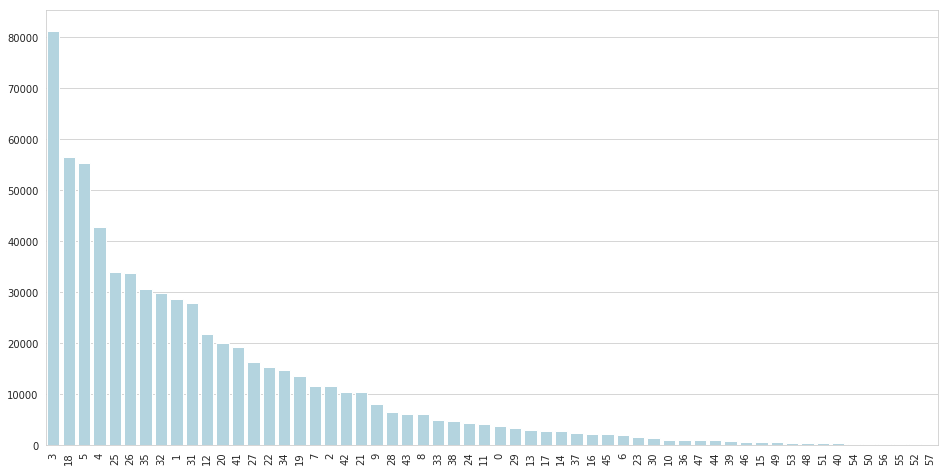

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))
_ = sns.barplot(x=np.arange(category_count.shape[0]), y=category_count['count'].values, color='lightblue')
_ = plt.xticks(range(category_count.shape[0]), category_count['Category'].values, rotation=90)

## check sample_submission

In [6]:
sample_submission = pd.read_csv('datasets/data_info_val_sample_submission.csv')

print(sample_submission.shape)
display(sample_submission.head())

(172402, 2)


,itemid,Category
0,370855998,32
1,637234604,20
2,690282890,18
3,930913462,18
4,1039280071,11


## explore training set

In [7]:
! ls datasets/fashion_image | head -5

000006831bfaf0e3b5ce3564a10e6dd4.jpg
0000d56c8928edfc954d9126af9cde4b.jpg
00010f55805ad6ac178da75b27a6986f.jpg
000114ad41c2b31c4634660178be8da5.jpg
00011755e77cde6693e1b2f4ca5e413d.jpg
ls: write error: Broken pipe


In [8]:
! ls datasets/mobile_image | head -5

0000456f97a4805ba4960084ffc8c058.jpg
00018defe03935e545929201b8eec50a.jpg
0003ae5382360f19c88e83bc3d13e93d.jpg
0003cb2b0c95619f009df611f77e0cf1.jpg
0004390752e0372ebe568d929d463837.jpg
ls: write error: Broken pipe


In [9]:
! ls datasets/beauty_image | head -5

000004d60c92af4390399d71a305f64b.jpg
0000113904d1bc15232ee3b8a5432254.jpg
0000152e7d1cf21228cdd0e2e195aff8.jpg
00005d4b09cb3033698d9f1b98a9c04b.jpg
00007c8e378e49c81e9a409ed936e4cb.jpg
ls: write error: Broken pipe


### visualize training set samples

In [10]:
train_samples = labels.sample(16).reset_index(drop=True)
display(train_samples.head())

,itemid,title,Category,image_path
0,914649475,ertos original bpom cc cream whitening,5,beauty_image/e8765eeff4a9ead7f04b903fae0075d5.jpg
1,1292026108,murah di shopee immortal two way cake acne kod...,3,beauty_image/50a890df86fb75d27147f1703ce03777.jpg
2,1063361669,habisin stock otterbox symmetry series for app...,31,mobile_image/84f27b01435301f628745f63e9a1d4e7.jpg
3,1217156119,promo cuci gudang hari jadi toko kami stock te...,32,mobile_image/64222a57cc98d075d3828bfd7d464052.jpg
4,1558161844,zoya cosmetics bb cream,5,beauty_image/30187751cce5fe4b0694ab591a9fd3f8.jpg


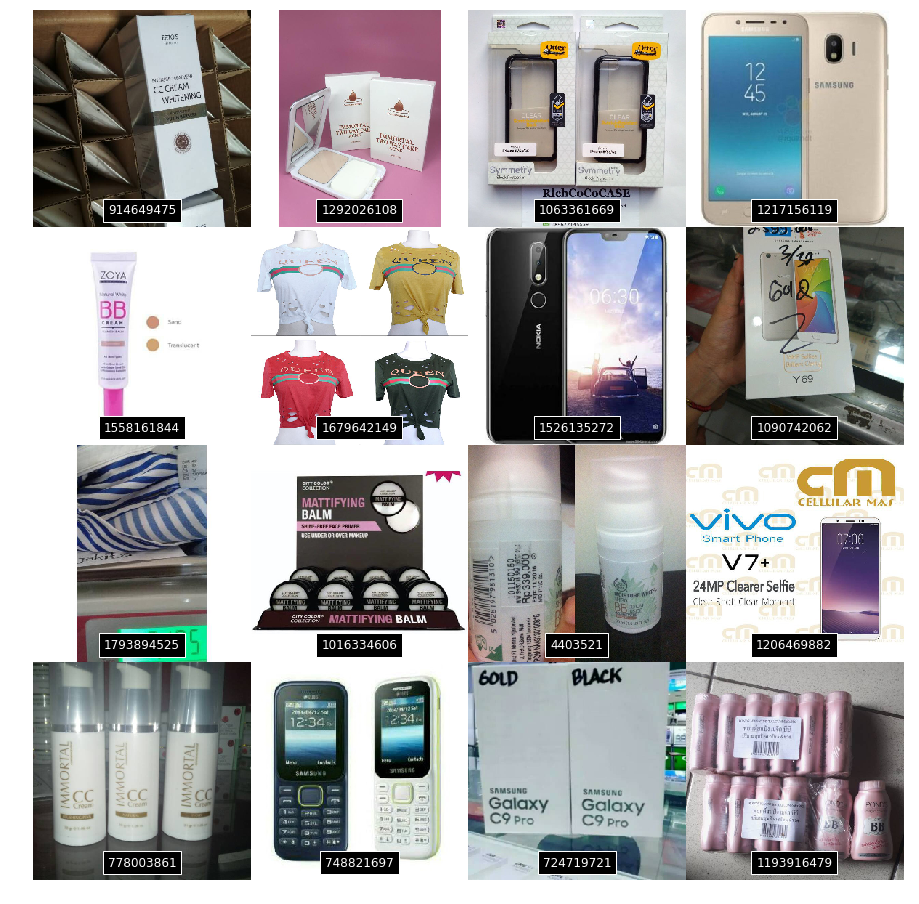

In [24]:

utils = reload(src.utils)
train_grid = utils.plot_image_grid(image_samples=train_samples)

## explore test sets

In [30]:
# test_samples = sample_submission.sample(16)
# test_samples.head()

In [31]:
# test_grid = utils.plot_image_grid(image_samples=test_samples, train=False)